In [2]:
!pip install ludwig

Defaulting to user installation because normal site-packages is not writeable


# Ludwig Dataset Zoo

https://ludwig.ai/latest/user_guide/datasets/dataset_zoo/#zoo-datasets

In [3]:
import ludwig

from ludwig import datasets

ludwig.datasets.list_datasets()

['adult_census_income',
 'ae_price_prediction',
 'agnews',
 'allstate_claims_severity',
 'amazon_employee_access_challenge',
 'amazon_review_polarity',
 'amazon_reviews',
 'ames_housing',
 'bbcnews',
 'bnp_claims_management',
 'bookprice_prediction',
 'california_house_price',
 'connect4',
 'creditcard_fraud',
 'customer_churn_prediction',
 'data_scientist_salary',
 'dbpedia',
 'electricity',
 'ethos_binary',
 'fake_job_postings2',
 'fever',
 'flickr8k',
 'forest_cover',
 'goemotions',
 'goodbooks_books',
 'google_qa_answer_type_reason_explanation',
 'google_qa_question_type_reason_explanation',
 'google_quest_qa',
 'higgs',
 'ieee_fraud',
 'imbalaced_insurance',
 'imdb',
 'imdb_genre_prediction',
 'insurance_lite',
 'iris',
 'irony',
 'jc_penney_products',
 'jigsaw_unintended_bias',
 'jigsaw_unintended_bias100K',
 'kdd_appetency',
 'kdd_churn',
 'kdd_upselling',
 'kick_starter_funding',
 'melbourne_airbnb',
 'mercari_price_suggestion',
 'mercari_price_suggestion100K',
 'mercedes_benz_

In [4]:
# Prints the description of the titanic dataset.
print(ludwig.datasets.describe_dataset("titanic"))

The Titanic dataset: use machine learning to create a model
that predicts which passengers survived the Titanic shipwreck.



# Set Kaggle credentials

In [5]:
import os

os.environ['KAGGLE_USERNAME'] = 'justinxzhao'
os.environ['KAGGLE_KEY'] = '30b5efee567cbc5185bd3c0a19489dce'

# Load the titanic dataset from kaggle

https://www.kaggle.com/competitions/titanic

In [6]:
titanic = ludwig.datasets.get_dataset("titanic")

# Loads into split dataframes:
train_df, test_df, _ = titanic.load(split=True)

In [7]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


# Rotten Tomatoes Dataset

In [8]:
import pandas as pd

df = pd.read_csv('rotten_tomatoes.csv')
test_df = pd.read_csv('rotten_tomatoes_test.csv')
df.head()

,Unnamed: 0,movie_title,content_rating,genres,runtime,top_critic,review_content,recommended
0,283875,Deliver Us from Evil,R,"Action & Adventure, Horror",117.0,True,"Director Scott Derrickson and his co-writer, P...",0
1,161408,Barbara,PG-13,"Art House & International, Drama",105.0,False,"Somehow, in this stirring narrative, Barbara m...",1
2,423417,Horrible Bosses,R,Comedy,98.0,False,These bosses cannot justify either murder or l...,0
3,583216,Money Monster,R,Drama,98.0,False,A satire about television that feels like it w...,0
4,165537,Battle Royale,NR,"Action & Adventure, Art House & International,...",114.0,False,Battle Royale is The Hunger Games not diluted ...,1


# Declare your features

In [9]:
import yaml

# GBMs only support CATEGORY, BINARY, and NUMBER features.
config = yaml.safe_load("""
input_features:
    - name: content_rating
      type: category
    - name: top_critic
      type: binary
    - name: runtime
      type: number
output_features:
    - name: recommended
      type: binary
model_type: gbm
""")

In [10]:
from ludwig.api import LudwigModel
import logging

model = LudwigModel(config=config, logging_level=logging.INFO)
train_stats, preprocessed_data, output_directory = model.train(dataset=df)


╒════════════════════════╕
│ EXPERIMENT DESCRIPTION │
╘════════════════════════╛

╒══════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                                 │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                            │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /workspaces/ludwig/results/api_experiment_run_11                                               │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│ ludwig_version   │ '0.7.dev'                                                             

/usr/local/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(



╒══════════╕
│ TRAINING │
╘══════════╛

Training for 1000 boosting round(s), approximately 20 round(s) of evaluation.
Early stopping policy: 5 round(s) of evaluation, or 250 boosting round(s).

Starting with step 0


/usr/local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


Training:   0%|                                                | 0/1000 [00:00<?, ?it/s][LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=315, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=315
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.03, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.03
[LightGBM] [Warning] lambda_l1 is set=0.25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.25
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will

# Model evaluation

In [11]:
# Generates predictions and performance statistics for the test set.
predictions, _ = model.predict(dataset='rotten_tomatoes_test.csv')
predictions.head()

Prediction: 100%|█████████████████████████████████████████| 1/1 [00:00<00:00, 27.40it/s]


,recommended_probabilities,recommended_predictions,recommended_probabilities_False,recommended_probabilities_True,recommended_probability
0,"[0.2414799928665161, 0.7585200071334839]",True,0.241480,0.758520,0.758520
1,"[0.36243098974227905, 0.637569010257721]",True,0.362431,0.637569,0.637569
2,"[0.1973220705986023, 0.8026779294013977]",True,0.197322,0.802678,0.802678
3,"[0.38485050201416016, 0.6151494979858398]",True,0.384851,0.615149,0.615149
4,"[0.25940805673599243, 0.7405919432640076]",True,0.259408,0.740592,0.740592


# Serve the model

In [13]:
!ludwig serve --model_path results/api_experiment_run_11/model

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.7.dev - Serve

/usr/local/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
INFO:     Started server process [64821]
Started server process [64821]
INFO:     Waiting for application startup.
Waiting for application startup.
INFO:     Application startup complete.
Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     127.0.0.1:50148 - "POST /predict HTTP/1.1" 200 OK
^C
INFO:     Shutting down
Shutting down
INFO:     

# Model Iteration!

In [14]:
# How does this compare with a model that can use unstructured features?
# config = yaml.safe_load("""
# input_features:
#     - name: content_rating
#       type: category
#     - name: top_critic
#       type: binary
#     - name: runtime
#       type: number
# output_features:
#     - name: recommended
#       type: binary
# model_type: gbm
# """)

# New config
config = yaml.safe_load("""
input_features:
    - name: genres
      type: set
      preprocessing:
          tokenizer: comma
    - name: content_rating
      type: category
    - name: top_critic
      type: binary
    - name: runtime
      type: number
    - name: review_content
      type: text
      encoder:
          type: embed
output_features:
    - name: recommended
      type: binary
""")

model = LudwigModel(config=config, logging_level=logging.INFO)
train_stats, preprocessed_data, output_directory = model.train(dataset=df)


╒════════════════════════╕
│ EXPERIMENT DESCRIPTION │
╘════════════════════════╛

╒══════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                                 │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                            │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /workspaces/ludwig/results/api_experiment_run_12                                               │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│ ludwig_version   │ '0.7.dev'                                                             

# Inspect the model architecture

In [15]:
import torchinfo

print(
    torchinfo.summary(
        model.model, input_data=[model.model.get_model_inputs()],
        depth=20
    )
)

Layer (type:depth-idx)                                  Output Shape              Param #
ECD                                                     [2]                       --
├─ConcatCombiner: 1-1                                   --                        (recursive)
│    └─LudwigFeatureDict: 2-1                           --                        --
│    │    └─ModuleDict: 3-1                             --                        --
│    │    │    └─SetInputFeature: 4-1                   [2, 22]                   --
│    │    │    │    └─SetSparseEncoder: 5-1             [2, 22]                   --
│    │    │    │    │    └─EmbedSet: 6-1                [2, 22]                   --
│    │    │    │    │    │    └─Embedding: 7-1          [2, 22, 22]               484
│    │    │    │    │    └─FCStack: 6-2                 [2, 22]                   --
│    │    │    └─CategoryInputFeature: 4-2              [2, 6]                    --
│    │    │    │    └─CategoricalEmbedEncoder: 5-2

# Visualize learning curves

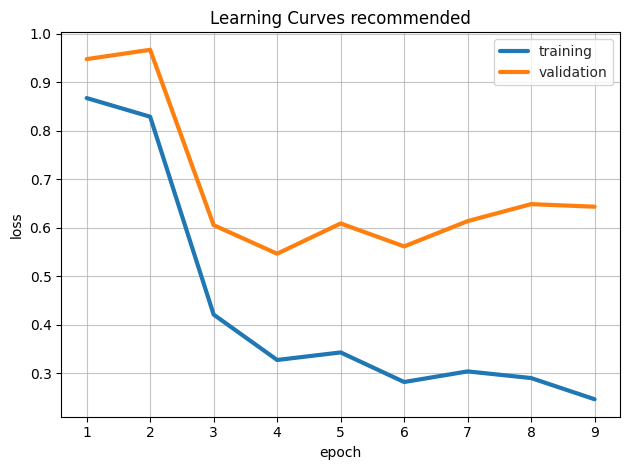

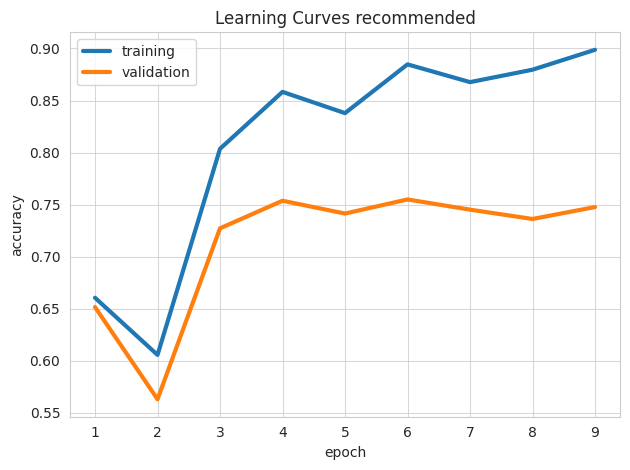

In [16]:
# Visualizes learning curves, which show how performance metrics changed over
# time during training.
from ludwig.visualize import learning_curves

learning_curves(train_stats, output_feature_name='recommended')

# Visualize metrics with Tensorboard

In [ ]:
!tensorboard --logdir=results/api_experiment_run_12/model

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.0 at http://localhost:6006/ (Press CTRL+C to quit)


# Try a huggingface model

In [ ]:
# How does this compare with a huggingface model?
# New Config. Only keep the text feature, and use a pre-trained model.
config = yaml.safe_load("""
input_features:
    - name: review_content
      type: text
      encoder:
          type: b
          trainable: true
output_features:
    - name: recommended
      type: binary
""")

model = LudwigModel(config=config, logging_level=logging.INFO)
train_stats, preprocessed_data, output_directory = model.train(dataset=df)

In [ ]:
from ludwig.encoders.registry import encoder_registry
from ludwig.schema.preprocessing import PreprocessingConfig
from pprint import pprint

# Full list of encoders
# pprint(encoder_registry)